## In Class Project
Using Chicago Open Data Portal

download data Car Crahses

https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

    export button, save as a csv file.

Objective where the worst place to park in Chicago.

    to learning basic sci kit learn preprocessing
    learn k means clustering
    to install run from command prompt 'pip install scikit-learn'
    to learn standard data science work flow



## Scenario
A task for has been setup in the city of Chicago to crack down on  'NARCOTICS'.

Part of the strategy of the task for is use 'predictive policing' to deploy officers to know narcotics hotspots to increase survallence and police presences in the neighborhoods..



### Deliverables
a pdf or html markdown document, uploaded.
+ Use a cluster model to idenity 3 areas where policy may be deployed.  
+ Create plots that providing supporting evidence that narcotics violations are happening in that area
+ Create plots that support that te cluster bounderies are correctly assigned
+ Provide a written summary of your findings, recomendations potential pitfalls and advantages of using this particular method


### Steps 
+ load data
+ filter to only narcotics violations
+ scale 'Latitude', 'Longitude',
+ cluster 'Latitude', 'Longitude',
+ plot clusters
+ silloute plot clusters
+ barplot cluster centers by count
+ Write a summary

In [82]:
# load in data
import pandas as pd
file_name = 'data/Crimes_-_2018.csv'
data = pd.read_csv(file_name)
data.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11583222,JC136409,12/26/2018 12:01:00 AM,044XX S RACINE AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,11.0,61.0,11,NaN,NaN,2018,02/02/2019 04:07:45 PM,NaN,NaN,NaN


In [83]:
set(data['Primary Type'])

{'ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

In [84]:
# filter and scale data
from sklearn.preprocessing import StandardScaler 

data_filtered = data.loc[data['Primary Type'] == 'NARCOTICS', ['Latitude','Longitude']]
data_filtered.dropna(inplace=True)
s = StandardScaler()
data_scaled = s.fit_transform(data_filtered)
data_scaled.shape



(12798, 2)

In [85]:
# to build the cluster model with k means, you need to import it from sklearn 
from sklearn.cluster import KMeans
model =  KMeans(n_clusters=5)
model.fit(X=data_scaled)
clusters = model.predict(data_scaled)



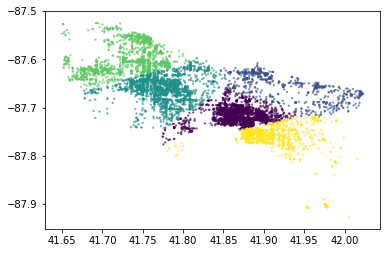

In [86]:
from matplotlib import pyplot as plt
x = data_filtered['Latitude']
y = data_filtered['Longitude']
colors = clusters
plt.figure()
plt.scatter(x, y,s =2, c=clusters, alpha=.5)
plt.show()

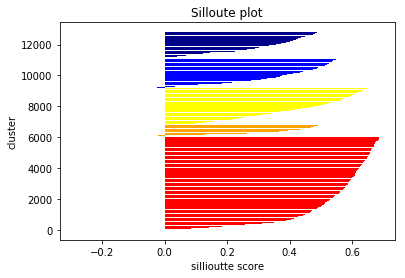

In [87]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.colors import LinearSegmentedColormap

# between -1 and 1, higher number indicates you have good configurations, if you 

clusters = model.predict(data_scaled)

# get the s score for each row of data
scores = silhouette_samples(data_scaled, clusters)
# get the cluster number which the model assignes each row to

# get the s score the the entire data set
silhouette_score(data_scaled, clusters)

cmap = ['red','orange', 'yellow', 'blue', 'darkblue', 'purple'] * 100
colors = [cmap[j] for  _, j in enumerate(clusters)]

# create a bar plot to show each silloute
to_plot = pd.DataFrame({'scores':scores, 'labels':clusters, 'colors': colors})
to_plot.sort_values(['labels', 'scores'], inplace=True)

plt.figure()
plt.barh(range(to_plot.shape[0]), to_plot['scores'], color= to_plot['colors'])
plt.xlabel('sillioutte score')
plt.ylabel('cluster')
plt.title('Silloute plot')
plt.show()


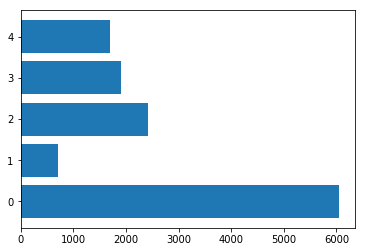

In [88]:
cluster_df = pd.DataFrame({'clusters':clusters})
cluster_df = cluster_df.groupby('clusters')['clusters'].count()
cluster_df.sort_values(inplace=True)

plt.figure()
plt.barh(cluster_df.index, cluster_df.values )
plt.show()

In [90]:
#  get the gps coords out
centers = model.cluster_centers_ 
s.inverse_transform(centers )

array([[ 41.8753473 , -87.71738817],
       [ 41.92877894, -87.65683491],
       [ 41.77694299, -87.66011609],
       [ 41.73436362, -87.59894997],
       [ 41.90116098, -87.7612892 ]])